In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-modelingclassification-problem/credit_risk_file_1.xlsx
/kaggle/input/credit-risk-modelingclassification-problem/credit_risk_file_2.xlsx


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os

In [3]:
# Load the dataset
a1 = pd.read_excel("/kaggle/input/credit-risk-modelingclassification-problem/credit_risk_file_1.xlsx")
a2 = pd.read_excel("/kaggle/input/credit-risk-modelingclassification-problem/credit_risk_file_2.xlsx")

In [4]:
df1 = a1.copy()
df2 = a2.copy()

In [5]:
# Remove nulls
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [6]:
columns_to_be_removed = []

for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_removed .append(i)


In [7]:
df2 = df2.drop(columns_to_be_removed, axis =1)



for i in df2.columns:
    df2 = df2.loc[ df2[i] != -99999 ]

In [8]:
# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)

PROSPECTID


In [33]:
df.columns

Index(['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL',
       'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL',
       'Age_Newest_TL', 'time_since_recent_payment',
       'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever',
       'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag', 'MARITALSTATUS',
       'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2',
       'Approved_Flag'],
      dtype='object')

In [9]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [30]:
df.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,0.000,0.0,0,0.000,0,0,0,4,1,4,...,0.000,0.0,1,0,Married,2,M,PL,PL,P2
1,0.000,0.0,0,0.000,0,0,0,0,0,1,...,0.000,0.0,0,0,Single,3,F,ConsumerLoan,ConsumerLoan,P2
2,0.125,0.0,0,0.000,1,0,0,0,2,6,...,0.000,0.0,1,0,Married,1,M,ConsumerLoan,others,P2
3,0.000,0.0,0,0.000,0,0,0,0,3,0,...,0.000,0.0,0,0,Married,4,M,AL,AL,P1
4,0.000,0.0,1,0.167,0,0,0,0,6,0,...,0.429,0.0,1,0,Married,2,M,ConsumerLoan,PL,P3


Data Types of Each Column:
pct_tl_open_L6M              float64
pct_tl_closed_L6M            float64
Tot_TL_closed_L12M             int64
pct_tl_closed_L12M           float64
Tot_Missed_Pmnt                int64
CC_TL                          int64
Home_TL                        int64
PL_TL                          int64
Secured_TL                     int64
Unsecured_TL                   int64
Other_TL                       int64
Age_Oldest_TL                  int64
Age_Newest_TL                  int64
time_since_recent_payment      int64
max_recent_level_of_deliq      int64
num_deliq_6_12mts              int64
num_times_60p_dpd              int64
num_std_12mts                  int64
num_sub                        int64
num_sub_6mts                   int64
num_sub_12mts                  int64
num_dbt                        int64
num_dbt_12mts                  int64
num_lss                        int64
recent_level_of_deliq          int64
CC_enq_L12m                    int64
PL_enq_L12m

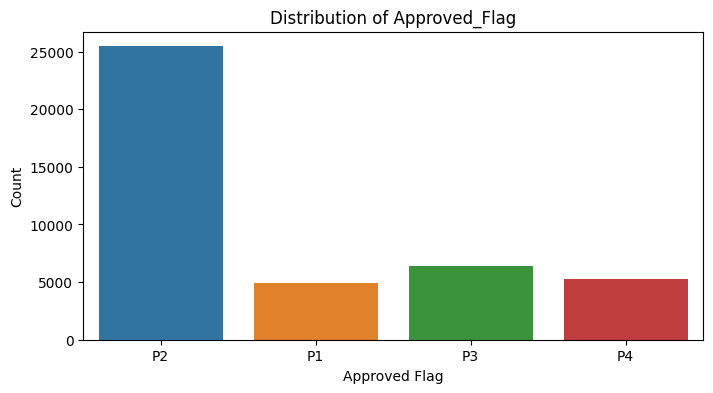

Proportion of Approved and Rejected Applications:
Approved_Flag
P2    0.605078
P3    0.153100
P4    0.125143
P1    0.116679
Name: proportion, dtype: float64


In [28]:
# Analyzing data types and distributions of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

# Display data types of each column
data_types = df.dtypes
print("Data Types of Each Column:")
print(data_types)

# Analyze the distribution of the target variable "Approved_Flag"
plt.figure(figsize=(8, 4))
sns.countplot(x='Approved_Flag', data=df)
plt.title('Distribution of Approved_Flag')
plt.xlabel('Approved Flag')
plt.ylabel('Count')
plt.show()

# Display the proportion of approved and rejected applications
approved_counts = df['Approved_Flag'].value_counts(normalize=True)
print("Proportion of Approved and Rejected Applications:")
print(approved_counts)

In [11]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [12]:
# Chi-square test
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


In [13]:
# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)

In [14]:
# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0



for i in range (0,total_columns):
    
    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)
    
    
    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1
    
    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)


/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000327
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735


/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.8328007921530785
3 --- 6.099653381646727
3 --- 5.581352009642762
4 --- 1.985584353098778


/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


5 --- inf
5 --- 4.809538302819343
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.3843464059655854
7 --- 3.0646584155234238
8 --- 2.898639771299252
9 --- 4.377876915347324
10 --- 2.207853583695844
11 --- 4.916914200506864
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721438


/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15 --- inf
15 --- 7.380634506427232
15 --- 1.421005001517573
16 --- 8.083255010190323
16 --- 1.6241227524040114
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.825857047132431
18 --- 1.5080839450032664
19 --- 2.172088834824578
20 --- 2.623397553527229
21 --- 2.2959970812106167
22 --- 7.360578319196446
22 --- 2.1602387773102554
23 --- 2.8686288267891467
24 --- 6.458218003637277
24 --- 2.8474118865638265
25 --- 4.7531981562840855
26 --- 16.22735475594825
26 --- 6.424377256363877
26 --- 8.887080381808687
26 --- 2.3804746142952666
27 --- 8.609513476514548
27 --- 13.06755093547673
27 --- 3.5000400566546555
28 --- 1.9087955874813773
29 --- 17.006562234161628
29 --- 10.730485153719197
29 --- 2.3538497522950275
30 --- 22.104855915136433
30 --- 2.7971639638512924
31 --- 3.424171203217696
32 --- 10.175021454450912
32 --- 6.408710354561296
32 --- 1.001151196262563
33 --- 3.069197305397274
34 --- 2.8091261600643724
35 --- 20.249538381980678
35 --- 15.864576541593774
35 --- 1.83316497405

In [16]:
# check Anova for columns_to_be_kept 

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])  
    b = list(df['Approved_Flag'])  
    
    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [17]:

# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]


In [18]:

# Label encoding for the categorical features
['MARITALSTATUS', 'EDUCATION', 'GENDER' , 'last_prod_enq2' ,'first_prod_enq2']



df['MARITALSTATUS'].unique()    
df['EDUCATION'].unique()
df['GENDER'].unique()
df['last_prod_enq2'].unique()
df['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [19]:

df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3

In [20]:

df['EDUCATION'].value_counts()
df['EDUCATION'] = df['EDUCATION'].astype(int)
df.info()



df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            42064 non-null  float64
 1   pct_tl_closed_L6M          42064 non-null  float64
 2   Tot_TL_closed_L12M         42064 non-null  int64  
 3   pct_tl_closed_L12M         42064 non-null  float64
 4   Tot_Missed_Pmnt            42064 non-null  int64  
 5   CC_TL                      42064 non-null  int64  
 6   Home_TL                    42064 non-null  int64  
 7   PL_TL                      42064 non-null  int64  
 8   Secured_TL                 42064 non-null  int64  
 9   Unsecured_TL               42064 non-null  int64  
 10  Other_TL                   42064 non-null  int64  
 11  Age_Oldest_TL              42064 non-null  int64  
 12  Age_Newest_TL              42064 non-null  int64  
 13  time_since_recent_payment  42064 non-null  int

/tmp/ipykernel_33/2320436159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION'] = df['EDUCATION'].astype(int)


In [21]:
df_encoded.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.000,0.0,0,0.000,0,0,0,4,1,4,...,False,False,True,False,False,False,False,False,True,False
1,0.000,0.0,0,0.000,0,0,0,0,0,1,...,True,False,False,False,False,False,True,False,False,False
2,0.125,0.0,0,0.000,1,0,0,0,2,6,...,True,False,False,False,False,False,False,False,False,True
3,0.000,0.0,0,0.000,0,0,0,0,3,0,...,False,False,False,False,True,False,False,False,False,False
4,0.000,0.0,1,0.167,0,0,0,0,6,0,...,True,False,False,False,False,False,False,False,True,False


In [22]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )




x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)





rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)





rf_classifier.fit(x_train, y_train)



y_pred = rf_classifier.predict(x_test)





accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()
    


Accuracy: 0.7636990372043266

Class p1:
Precision: 0.8370457209847597
Recall: 0.7041420118343196
F1 Score: 0.7648634172469203

Class p2:
Precision: 0.7957519116397621
Recall: 0.9282457879088206
F1 Score: 0.8569075937785909

Class p3:
Precision: 0.4423380726698262
Recall: 0.21132075471698114
F1 Score: 0.28600612870275793

Class p4:
Precision: 0.7178502879078695
Recall: 0.7269193391642371
F1 Score: 0.7223563495895703



In [38]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)




xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.78

Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660173

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665036

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.3749428440786465

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



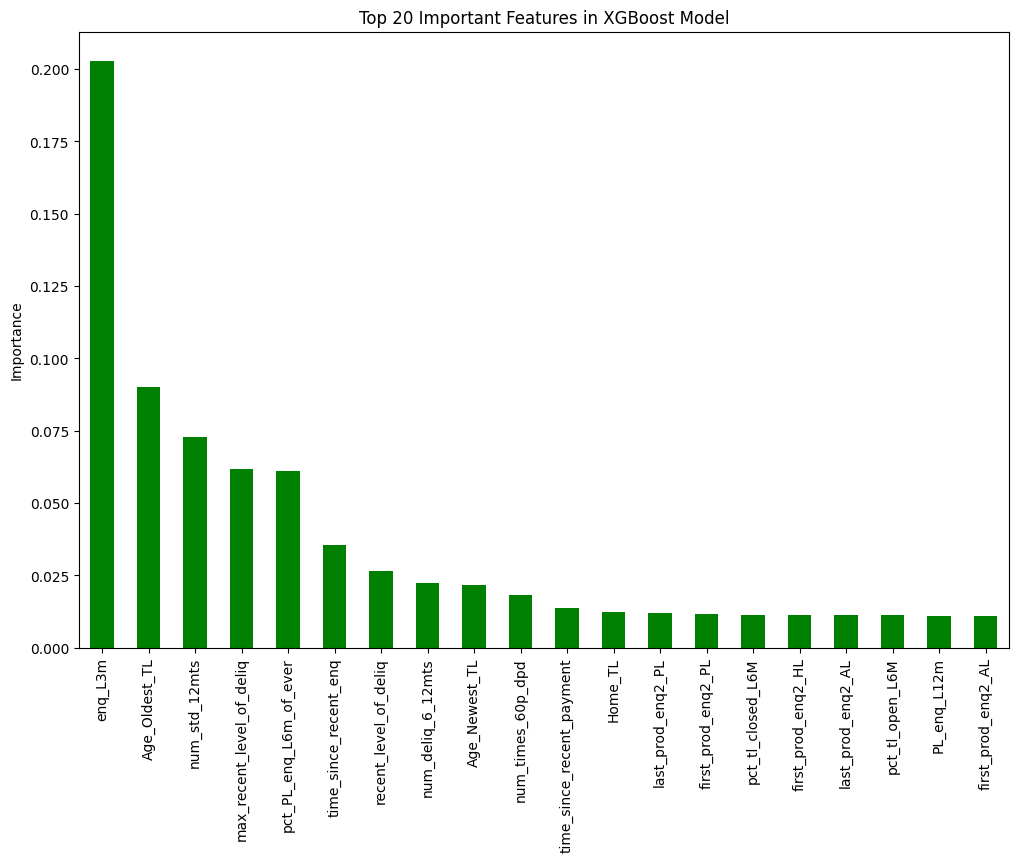

In [40]:
xgb_feature_importances = xgb_classifier.feature_importances_
xgb_feature_names = x_train.columns
xgb_importances = pd.Series(xgb_feature_importances, index=xgb_feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
xgb_importances[:20].plot(kind='bar', color='green')
plt.title('Top 20 Important Features in XGBoost Model')
plt.ylabel('Importance')
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier


y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.71

Class p1:
Precision: 0.724950884086444
Recall: 0.727810650887574
F1 Score: 0.7263779527559056

Class p2:
Precision: 0.8091350826044703
Recall: 0.8251734390485629
F1 Score: 0.8170755642787046

Class p3:
Precision: 0.341501976284585
Recall: 0.3260377358490566
F1 Score: 0.3335907335907336

Class p4:
Precision: 0.649746192893401
Recall: 0.6219630709426628
F1 Score: 0.6355511420059583



In [37]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define the XGBClassifier with the initial set of hyperparameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)

KeyboardInterrupt: 

In [47]:
from flask import Flask, render_template, request, redirect, url_for
import pandas as pd
import pickle

app = Flask(__name__)

# Load the trained XGBoost model
with open('xgb_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

def preprocess_data(df):
    # Perform any necessary preprocessing steps on the data
    # This should match the preprocessing steps used during model training
    # For example, encoding categorical variables, handling missing values, scaling features, etc.
    return df

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        # Check if the post request has the file part
        if 'file' not in request.files:
            flash('No file part')
            return redirect(request.url)
        
        file = request.files['file']

        # If the user does not select a file, the browser submits an empty file without a filename
        if file.filename == '':
            flash('No selected file')
            return redirect(request.url)

        if file:
            # Save the uploaded file to the server
            filename = 'uploaded_file.xlsx'
            file.save(filename)

            # Load the uploaded Excel file into a DataFrame
            df_unseen = pd.read_excel(filename)

            # Preprocess the data
            df_unseen_processed = preprocess_data(df_unseen)

            # Make predictions using the loaded model
            y_pred_unseen = xgb_model.predict(df_unseen_processed)

            # Add the predictions to the DataFrame
            df_unseen['Predictions'] = y_pred_unseen

            # Save the DataFrame with predictions to a new Excel file
            output_filename = 'unseen_with_predictions.xlsx'
            df_unseen.to_excel(output_filename, index=False)

            return redirect(url_for('results', filename=output_filename))

    return render_template('index.html')

@app.route('/results/<filename>')
def results(filename):
    # Render the results template with the filename
    return render_template('results.html', filename=filename)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 1042, in launch_instance
    app.initialize(argv)
  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 654, in initialize
    self.init_sockets()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 331, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/opt/conda/lib/python3.10/site-packages/

SystemExit: 1

In [44]:
import pickle
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming you have trained and saved your XGBoost model
# Load your DataFrame 'df_encoded' and preprocess it as needed

# Define and train your XGBoost model
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4)
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)
xgb_classifier.fit(x_train, y_train)

# Save the trained model to a .pkl file
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_classifier, f)


In [46]:
from flask import Flask, render_template, request, redirect, url_for
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
import pickle

app = Flask(__name__)

# Load the trained XGBoost model
with open('xgb_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        # Assuming you have a form to upload the Excel file
        file = request.files['file']
        if file:
            # Load the uploaded Excel file into a DataFrame
            df_unseen = pd.read_excel(file)

            # Preprocess the data as needed (same preprocessing steps as during model training)
            # For example, you may need to encode categorical variables and handle missing values

            # Make predictions using the loaded XGBoost model
            y_pred_unseen = xgb_model.predict(df_unseen)

            # Add predictions to the DataFrame if needed
            df_unseen['Predictions'] = y_pred_unseen

            # Save the DataFrame with predictions to a new Excel file
            output_filename = 'unseen_with_predictions.xlsx'
            df_unseen.to_excel(output_filename, index=False)

            return redirect(url_for('results', filename=output_filename))

    return render_template('index.html')

@app.route('/results/<filename>')
def results(filename):
    return render_template('results.html', filename=filename)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 1042, in launch_instance
    app.initialize(argv)
  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 654, in initialize
    self.init_sockets()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 331, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/opt/conda/lib/python3.10/site-packages/

SystemExit: 1